# Flipped vs Negative

**Goal:** I wanted a nice money plot for my QT summary, so here I'm just going to compare RNNIP, RNNIPFlip and RNNIPNeg for the l and c-rej on the same figure.

In [2]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("../..")
from usefulFcts import *
from trainNet import * #myLSTM, myPFN
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
subDir = 'mc16d_PFlow_ttbar_ip3d'
modelDir = '../../models/'+subDir
figDir = '../../figures/'

nTrks, nFeatures = 15, 13

vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTagTrain = "3mtrain_{}trks_{}".format(nTrks,vStr)

In [8]:
m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, 
           dataTag=dataTagTrain+'_sd0_rev', 
           nHidden=100,loadModel=True,nClasses=3)

Initialize method from myModel()
Loading previously trained LSTM


No need to load in the data, since I've already looked at this.

In [10]:
# Get the effs for the nominal configuation
(l,c,b), d = getEffs(m, [], [], [], returnDisc=True, figDir=figDir, subDir=subDir, modelDir=modelDir)

# Get the effs for the flipped configuration
(l_flip,c_flip,b_flip), d_flip = getEffs(m, [], [], [], returnDisc=True, figDir=figDir, 
                                           subDir=subDir, modelDir=modelDir,tag="_flip")

(l_neg,c_neg,b_neg), d_neg = getEffs(m, [], [], [], returnDisc=True, figDir=figDir, 
                                           subDir=subDir, modelDir=modelDir,tag="_neg")

leffs = [l, l_flip, l_neg]
ceffs = [c, c_flip, c_neg]
beffs = [b, b_flip, b_neg]

Load in the previously saved efficiency file
../../models/mc16d_PFlow_ttbar_ip3d/effs_LSTM_100units_10dense_3out_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev.json
Load in the previously saved efficiency file
../../models/mc16d_PFlow_ttbar_ip3d/effs_LSTM_100units_10dense_3out_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_flip.json
Load in the previously saved efficiency file
../../models/mc16d_PFlow_ttbar_ip3d/effs_LSTM_100units_10dense_3out_3mtrain_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_neg.json


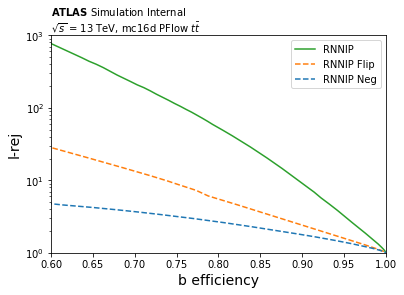

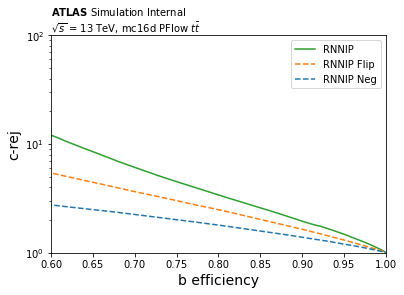

In [15]:
colors = ['C2','C1','C0']
styles = ['-','--','--']

labels = ['RNNIP {}'.format(config) for config in ['','Flip', 'Neg']]

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"$\sqrt{s}$ = 13 TeV, mc16d PFlow $t\bar{t}$"

plotROC(beffs, leffs, labels,text=text,
        ylabel='l-rej',styles=styles,colors=colors,
        figDir=figDir,subDir=subDir,tag='lrej_rnnip_flip_neg')
plotROC(beffs, ceffs, labels,text=text,
        ylabel='c-rej',styles=styles,colors=colors,ymax=100,
        figDir=figDir,subDir=subDir,tag='crej_rnnip_flip_neg')